In [6]:
import numpy as np  
import pandas as pd  
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt


In [7]:
data = {
    'age': ['<=30','<=30','31...40','>40','>40','>40','31...40','<=30','<=30','>40','<=30','31...40','31...40','>40'],
    'income': ['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'student': ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
    'buys_computer': ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
}

df = pd.DataFrame(data)

print(df)

age_mapping = {
    '<=30': 1,
    '31...40': 2,
    '>40': 3
}
income_mapping = {
    'high': 1,
    'medium': 2,
    'low': 3
}
student_mapping = {
    'yes': 1,
    'no': 2
    
}
credit_mapping = {
    'fair': 1,
    'excellent': 2
    
}
buys_comp_mapping = {
    'yes': 1,
    'no': 2
}


df['age'] = df['age'].map(age_mapping)
df['income'] = df['income'].map(income_mapping)
df['student'] = df['student'].map(student_mapping)
df['credit_rating'] = df['credit_rating'].map(credit_mapping)
df['buys_computer'] = df['buys_computer'].map(buys_comp_mapping)


print(df)

        age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no
    age  income  student  credit_rating  buys_computer
0     1       1        2              1              2
1     1       1        2              2           

In [9]:
#A1
from scipy.stats import entropy
target_entropy = entropy(df['buys_computer'].value_counts(normalize=True), base=2)

features = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for feature in features:
    weighted_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        entropy_subset = entropy(subset['buys_computer'].value_counts(normalize=True), base=2)
        weighted_entropy += weight * entropy_subset
   
    information_gain = target_entropy - weighted_entropy
    information_gains[feature] = information_gain

best_feature = max(information_gains, key=information_gains.get)
best_information_gain = information_gains[best_feature]

print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig:.3f}")

print(f"\nThe first feature for the decision tree is '{best_feature}' with Information Gain {best_information_gain:.3f}")


Information Gains:
age: 0.247
income: 0.029
student: 0.152
credit_rating: 0.048

The first feature for the decision tree is 'age' with Information Gain 0.247


In [10]:
#A2
X = df[['age', 'income', 'student', 'credit_rating']]
y = df['buys_computer']

model = DecisionTreeClassifier()

model.fit(X, y)

training_accuracy = model.score(X, y)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

tree_depth = model.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

Training Set Accuracy: 1.00
Depth of the Decision Tree: 4


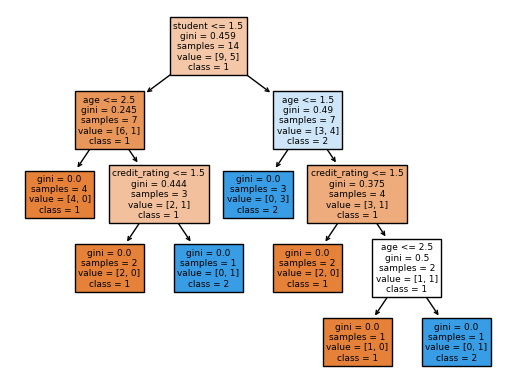

<Figure size 2000x1000 with 0 Axes>

In [11]:
#A3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
feature_names = [str(feature) for feature in X.columns]
class_names = [str(cls) for cls in model.classes_]
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names)
plt.figure(figsize=(20, 10)) 
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


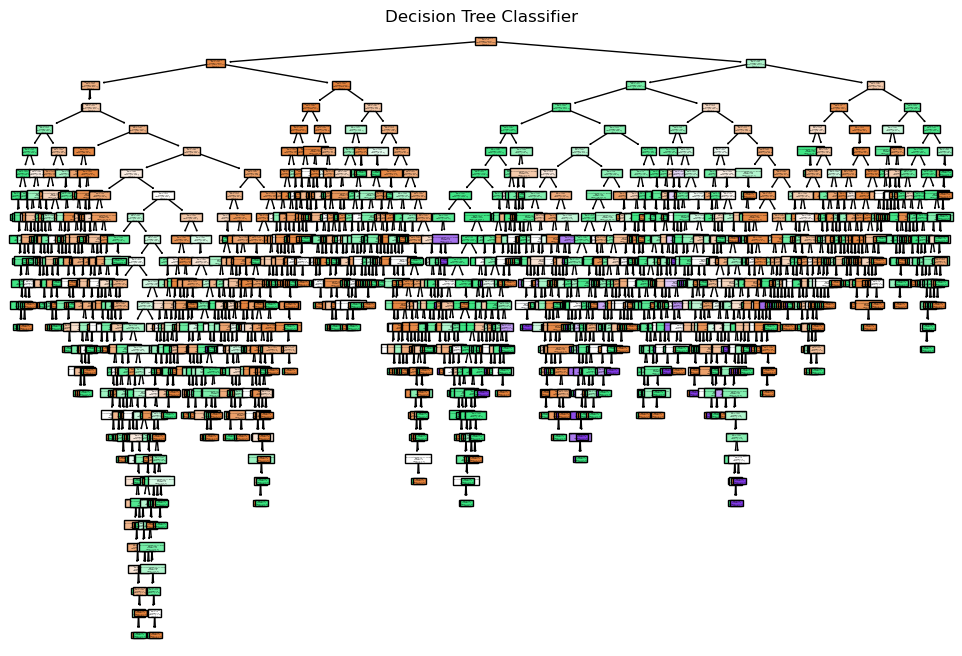

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

data = pd.read_csv('SolarPredictionfinal.csv')

label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])

feature_columns = ["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]

num_features = ["Temperature", "Pressure", "Humidity"]
num_bins = 5 
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
data[num_features] = discretizer.fit_transform(data[num_features])

target_bins = 3  
data["Radiation"] = pd.cut(data["Radiation"], bins=target_bins, labels=False)

X = data[feature_columns]
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=feature_columns, class_names=[str(i) for i in range(target_bins)])
plt.title("Decision Tree Classifier")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


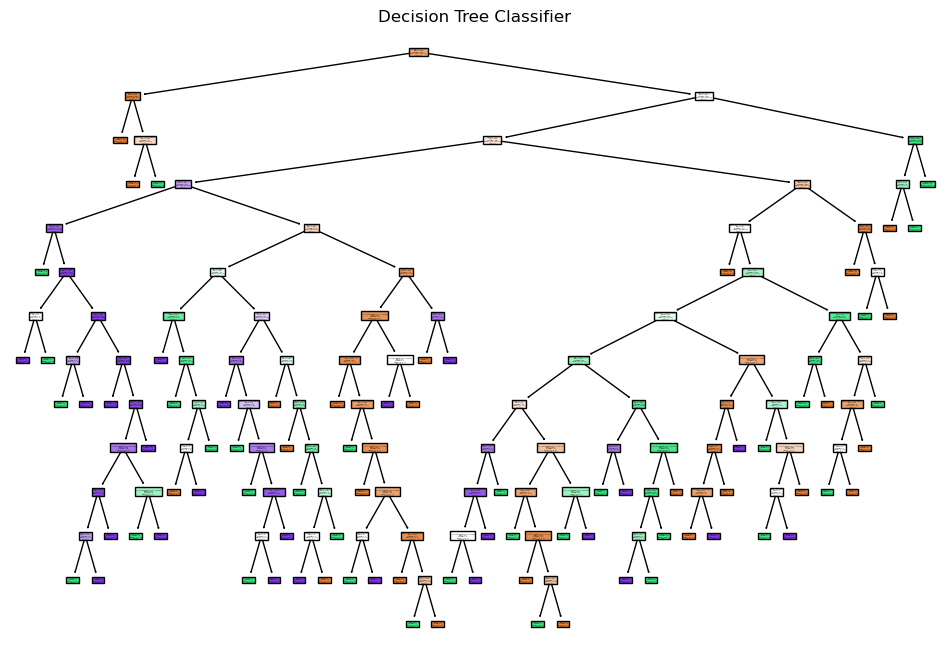

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

data = pd.read_csv('SolarPredictionfinal.csv')

data = data.head(2000)

label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])

feature_columns = ["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]

num_features = ["Temperature", "Pressure", "Humidity"]
num_bins = 5  
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
data[num_features] = discretizer.fit_transform(data[num_features])

target_bins = 3 
data["Radiation"] = pd.cut(data["Radiation"], bins=target_bins, labels=False)

X = data[feature_columns]
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=feature_columns, class_names=[str(i) for i in range(target_bins)])
plt.title("Decision Tree Classifier")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Accuracy with max_depth constraint of 5: 94.00%


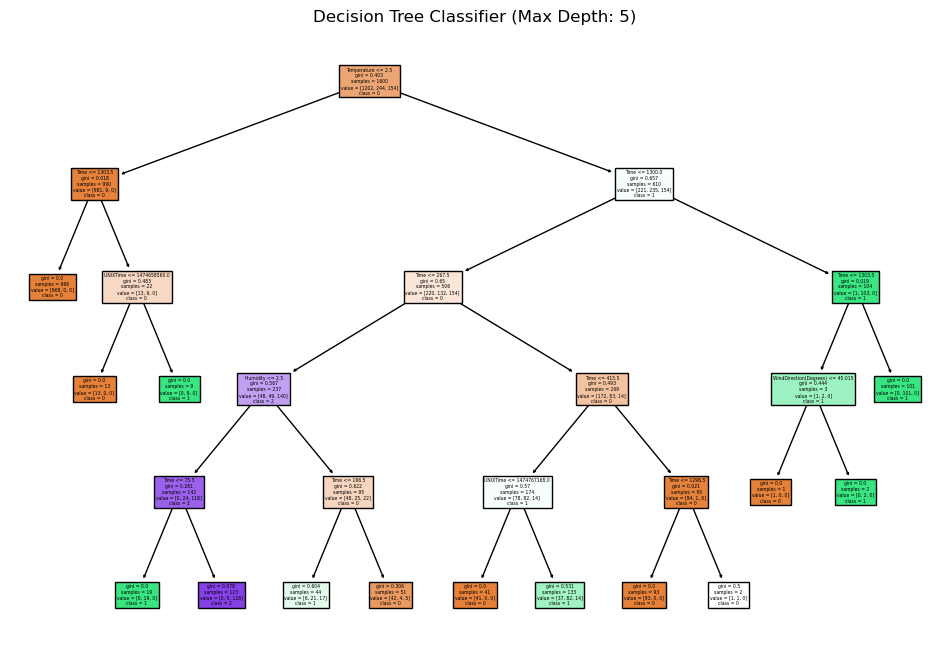

In [14]:
#A5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

data = pd.read_csv('SolarPredictionfinal.csv')

data = data.head(2000)

label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])

feature_columns = ["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]

num_features = ["Temperature", "Pressure", "Humidity"]
num_bins = 5  
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
data[num_features] = discretizer.fit_transform(data[num_features])

target_bins = 3  
data["Radiation"] = pd.cut(data["Radiation"], bins=target_bins, labels=False)


X = data[feature_columns]
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


max_depth_constraint = 5  
classifier = DecisionTreeClassifier(max_depth=max_depth_constraint, random_state=42)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max_depth constraint of {max_depth_constraint}: {accuracy * 100:.2f}%")


plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=feature_columns, class_names=[str(i) for i in range(target_bins)])
plt.title(f"Decision Tree Classifier (Max Depth: {max_depth_constraint})")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Accuracy with default criterion (Gini): 95.12%


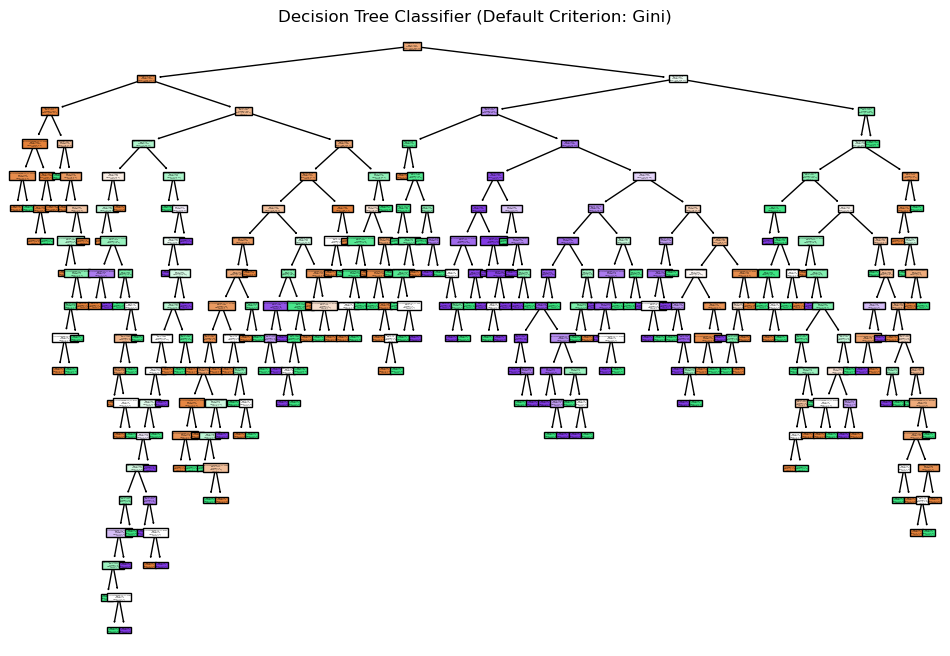

Accuracy with criterion='entropy': 94.25%


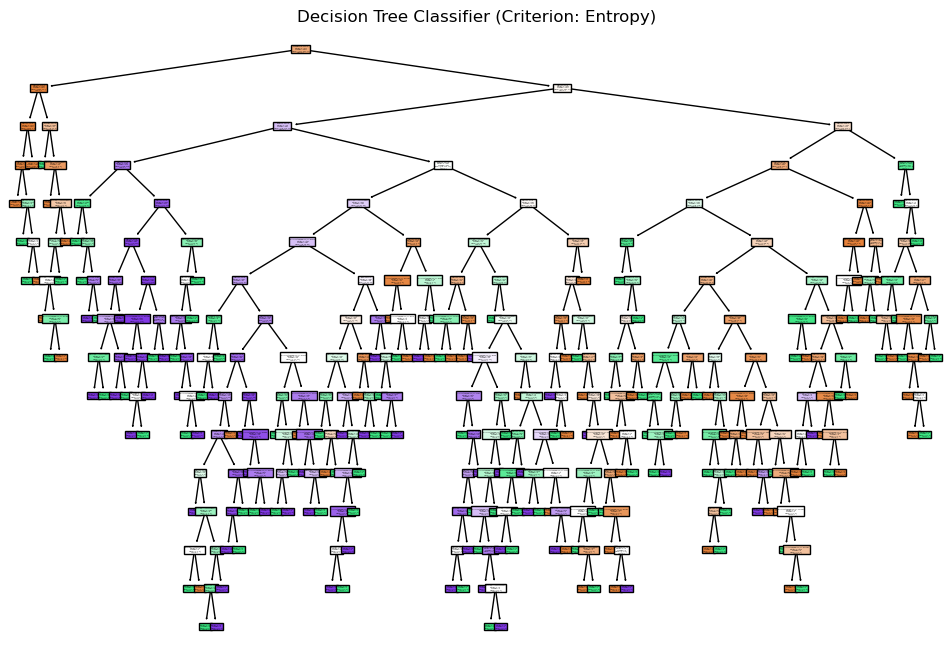

In [16]:
#A6
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

data = pd.read_csv('SolarPredictionfinal.csv')

data = data.head(4000)

label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])

feature_columns = ["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]

num_features = ["Temperature", "Pressure", "Humidity"]
num_bins = 5  

discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
data[num_features] = discretizer.fit_transform(data[num_features])


target_bins = 3  
data["Radiation"] = pd.cut(data["Radiation"], bins=target_bins, labels=False)


X = data[feature_columns]
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier_default = DecisionTreeClassifier(random_state=42)
classifier_default.fit(X_train, y_train)


y_pred_default = classifier_default.predict(X_test)


accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default criterion (Gini): {accuracy_default * 100:.2f}%")


plt.figure(figsize=(12, 8))
plot_tree(classifier_default, filled=True, feature_names=feature_columns, class_names=[str(i) for i in range(target_bins)])
plt.title("Decision Tree Classifier (Default Criterion: Gini)")
plt.show()


classifier_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
classifier_entropy.fit(X_train, y_train)


y_pred_entropy = classifier_entropy.predict(X_test)


accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with criterion='entropy': {accuracy_entropy * 100:.2f}%")


plt.figure(figsize=(12, 8))
plot_tree(classifier_entropy, filled=True, feature_names=feature_columns, class_names=[str(i) for i in range(target_bins)])
plt.title("Decision Tree Classifier (Criterion: Entropy)")
plt.show()


In [21]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('SolarPredictionfinal.csv')


num_bins = 5  
data["Radiation"] = pd.cut(data["Radiation"], bins=num_bins, labels=False)


label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])


X = data[["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]]
y = data["Radiation"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)


y_pred_decision_tree = decision_tree_classifier.predict(X_test)


accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_decision_tree * 100:.2f}%")
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))


Decision Tree Classifier:
Accuracy: 91.07%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4862
           1       0.69      0.66      0.67       719
           2       0.81      0.84      0.83       760
           3       0.68      0.68      0.68       193
           4       0.00      0.00      0.00         4

    accuracy                           0.91      6538
   macro avg       0.63      0.63      0.63      6538
weighted avg       0.91      0.91      0.91      6538

Confusion Matrix:
[[4709  132   19    2    0]
 [ 119  476   99   24    1]
 [  26   63  638   33    0]
 [  12   19   29  131    2]
 [   0    2    0    2    0]]


In [24]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('SolarPredictionfinal.csv')


num_bins = 5  
data["Radiation"] = pd.cut(data["Radiation"], bins=num_bins, labels=False)


label_encoder = LabelEncoder()
string_features = ["Data", "Time", "TimeSunRise", "TimeSunSet"]

for feature in string_features:
    data[feature] = label_encoder.fit_transform(data[feature])


X = data[["UNIXTime", "Data", "Time", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed", "TimeSunRise", "TimeSunSet"]]
y = data["Radiation"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)


random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)


y_pred_decision_tree = decision_tree_classifier.predict(X_test)
y_pred_random_forest = random_forest_classifier.predict(X_test)


accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_decision_tree * 100:.2f}%")
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_random_forest * 100:.2f}%")
print(classification_report(y_test, y_pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))


Decision Tree Classifier:
Accuracy: 91.07%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4862
           1       0.69      0.66      0.67       719
           2       0.81      0.84      0.83       760
           3       0.68      0.68      0.68       193
           4       0.00      0.00      0.00         4

    accuracy                           0.91      6538
   macro avg       0.63      0.63      0.63      6538
weighted avg       0.91      0.91      0.91      6538

Confusion Matrix:
[[4709  132   19    2    0]
 [ 119  476   99   24    1]
 [  26   63  638   33    0]
 [  12   19   29  131    2]
 [   0    2    0    2    0]]

Random Forest Classifier:
Accuracy: 93.61%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4862
           1       0.76      0.76      0.76       719
           2       0.87      0.88      0.88       760
           3       0.79      0.74      0.76     

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
